<a href="https://colab.research.google.com/github/babupallam/TensorFlow-Applications-with-Pre-trained-Models/blob/main/03_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Segmentation using DeepLabV3

Image segmentation is the process of partitioning an image into multiple segments, or pixels, to identify and separate different objects within an image.

Here, we'll use the pre-trained DeepLabV3 model with TensorFlow to perform image segmentation.

In [1]:
# Step 1: Install required libraries
!pip install -q tensorflow matplotlib


In [2]:
# Step 2: Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input


In [8]:

# Step 3: Load and prepare the DeepLabV3 model
model = tf.keras.applications.DenseNet201(weights='imagenet')
base_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False)


In [38]:

# Step 4: Upload and preprocess the image
from google.colab import files
uploaded = files.upload()

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path)

# Get the original size of the image
original_size = (img.size[1], img.size[0])

# Resize the image to a fixed size (e.g., 128x128)
fixed_size = (224, 224)
img_resized = img.resize(fixed_size)

# Convert the image to an array and preprocess it
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

Saving imageSeg.jpg to imageSeg (11).jpg


In [39]:
# Step 5: Perform image segmentation
preds = model.predict(img_array)
seg_map = np.argmax(preds, axis=-1)
seg_map = seg_map.squeeze()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


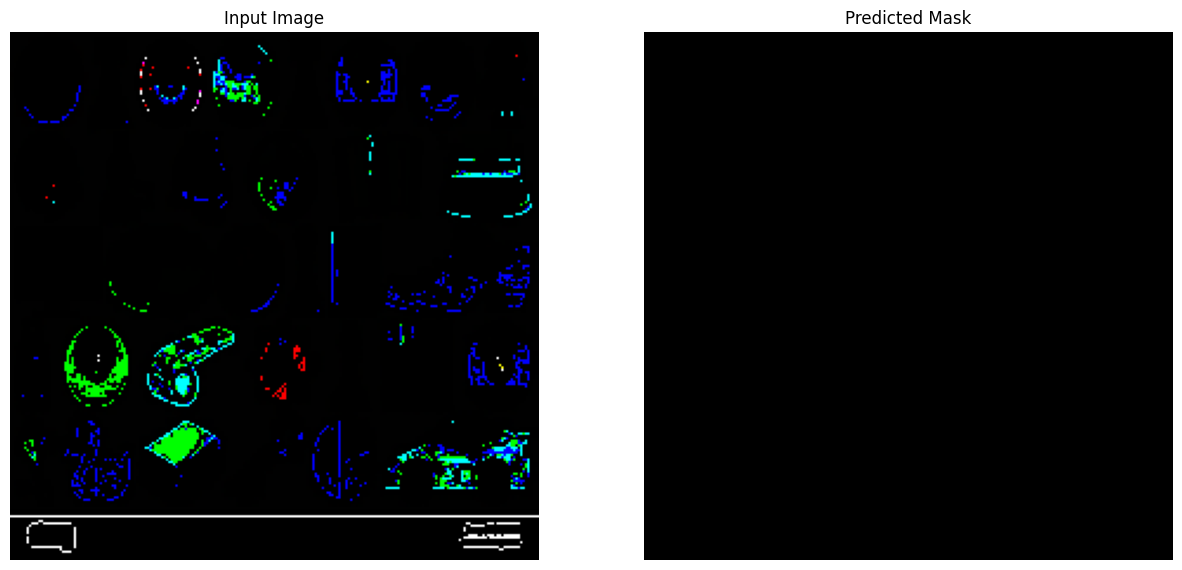

In [40]:
# Step 6: Visualize the segmented image
def create_mask(pred_mask):
    pred_mask = np.argmax(pred_mask, axis=-1)
    return pred_mask[..., None]  # Add a new axis to make it a 2D mask

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'Predicted Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        if i == 0:
            plt.imshow(display_list[i].astype('uint8'))  # Convert to uint8 for display
        else:
            plt.imshow(display_list[i], cmap='gray')  # Display the mask in grayscale
        plt.axis('off')
    plt.show()

mask = create_mask(preds) # Now returns a 2D mask
display([img_array[0], mask])


In [41]:

# Step 7: Save and download the segmented image
plt.imsave('segmented_image.png', mask, cmap='gray')
files.download('segmented_image.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>